In [1]:
#importing requisite library
import pandas as pd
import seaborn as sb
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#reading the dataset by choosing the head
tds=pd.read_csv("titanic_train.csv")
tds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#drop additional column
newtds=tds.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns')
newtds.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [4]:
#to review the dataset
newtds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Fare      891 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


In [5]:
#to check the datatype of columns
newtds.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
Fare        float64
dtype: object

In [6]:
#null values recognition 
newtds.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

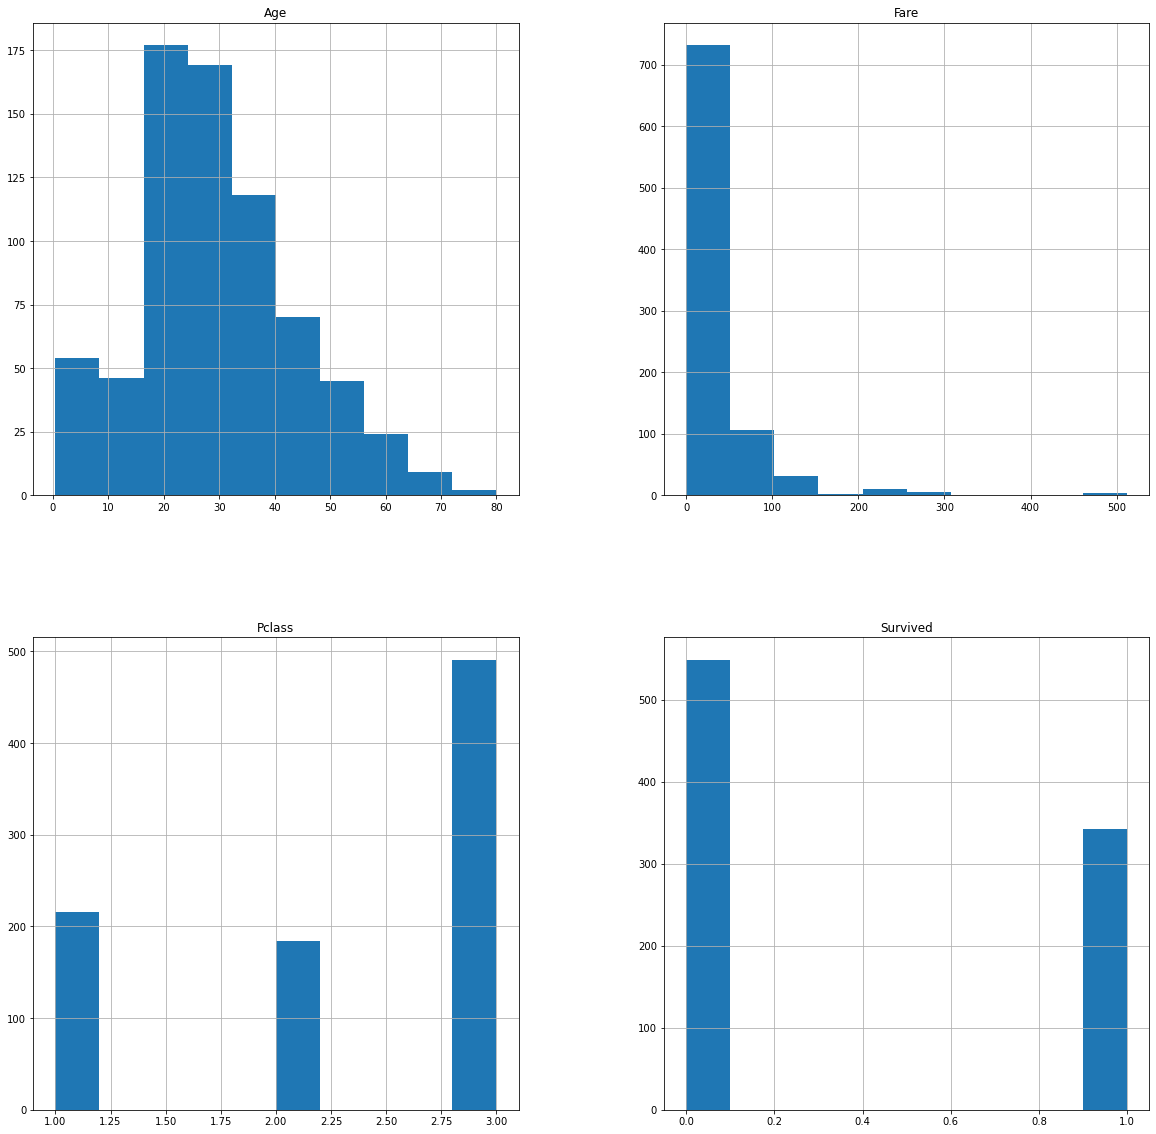

In [7]:
#observation of variable impact
newtds.hist(figsize=(20,20))
plt.show()

In [8]:
newtds.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [9]:
# Label Encoding over Sex Variable
newtds.Sex=newtds.Sex.map({'male':1,'female':2})
newtds.Sex

0      1
1      2
2      2
3      2
4      1
      ..
886    1
887    2
888    2
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [10]:
newtds

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,2,38.0,71.2833
2,1,3,2,26.0,7.9250
3,1,1,2,35.0,53.1000
4,0,3,1,35.0,8.0500
...,...,...,...,...,...
886,0,2,1,27.0,13.0000
887,1,1,2,19.0,30.0000
888,0,3,2,NaN,23.4500
889,1,1,1,26.0,30.0000


In [11]:
# null values handling
newtds.Age=newtds.Age.fillna(newtds.Age.mean())
newtds

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.000000,7.2500
1,1,1,2,38.000000,71.2833
2,1,3,2,26.000000,7.9250
3,1,1,2,35.000000,53.1000
4,0,3,1,35.000000,8.0500
...,...,...,...,...,...
886,0,2,1,27.000000,13.0000
887,1,1,2,19.000000,30.0000
888,0,3,2,29.699118,23.4500
889,1,1,1,26.000000,30.0000


In [12]:
# null values checking 
newtds.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In [16]:
#droping targeted variable
new_tds=newtds.drop('Survived',axis='columns')
new_tds.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,2,38.0,71.2833
2,3,2,26.0,7.9250
3,1,2,35.0,53.1000
4,3,1,35.0,8.0500


In [19]:
# holding target variable for predection
target=newtds.Survived
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [20]:
# to split dataset for training and testing
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(new_tds,target,test_size=0.3)
len(xtrain)

623

In [21]:
len(xtest)

268

In [22]:
#using decision tree classifier
from sklearn import tree
model=tree.DecisionTreeClassifier()
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [23]:
# training model with training data 
model.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [26]:
# model performance 
model.score(xtest,ytest)

0.7798507462686567

In [32]:
# model prediction
ytpred=model.predict(xtest)
ytpred

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1], dtype=int64)

In [28]:
xtest

,Pclass,Sex,Age,Fare
321,3,1,27.0,7.8958
546,2,2,19.0,26.0000
257,1,2,30.0,86.5000
105,3,1,28.0,7.8958
770,3,1,24.0,9.5000
...,...,...,...,...
855,3,2,18.0,9.3500
808,2,1,39.0,13.0000
666,2,1,25.0,13.0000
889,1,1,26.0,30.0000


In [33]:
# model prediction analysis using confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,ytpred)
cm

array([[123,  30],
       [ 29,  86]], dtype=int64)

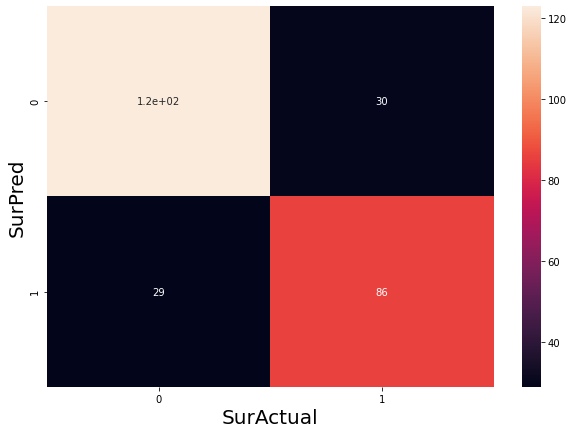

In [36]:
# confusion matrix view using heatmap
plt.figure(figsize=(10,7))
sb.heatmap(cm,annot=True)
plt.xlabel("SurActual",fontsize=20)
plt.ylabel("SurPred",fontsize=20)
plt.show()